In [45]:
import xml.etree.ElementTree as ET
import pandas as pd
from datetime import datetime

# Function to parse and extract step count data
def extract_step_count_data(root_element):
    step_data = []
    for record in root_element.iter('Record'):
        # Filter for step count records
        if record.get('type') == 'HKQuantityTypeIdentifierStepCount':
            # Extract date, time and step count
            date_time = record.get('startDate')  # startDate attribute contains the date and time
            steps = int(record.get('value'))  # value attribute contains the number of steps
            step_data.append({'DateTime': date_time, 'Steps': steps})
    return step_data

# Load and parse the XML file
tree = ET.parse('/Users/ilgazsahin/Desktop/apple_health_export 3/export.xml')
root = tree.getroot()

# Extracting step count data
step_count_data = extract_step_count_data(root)

# Converting to DataFrame for easier manipulation
df_steps = pd.DataFrame(step_count_data)

# Converting 'DateTime' to datetime object and extracting date
df_steps['DateTime'] = pd.to_datetime(df_steps['DateTime'])
df_steps['Date'] = df_steps['DateTime'].dt.date

# Grouping by date to get total steps per day
# Ensure only the 'Steps' column is being summed
daily_steps = df_steps.groupby('Date')['Steps'].sum()

# Save to CSV (if you want to export the daily steps summary)
daily_steps.to_csv('daily_steps.csv', header=True)

# Displaying first few entries
print(daily_steps.head())


Date
2019-03-26    2169
2019-03-27    6812
2019-03-28    2439
2019-03-29    3272
2019-03-30    4294
Name: Steps, dtype: int64


In [15]:
# Re-converting 'DateTime' to datetime object and extracting date (ensuring the conversion is correct)
df_steps['DateTime'] = pd.to_datetime(df_steps['DateTime'])
df_steps['Date'] = df_steps['DateTime'].dt.date

# Ensuring 'Date' is of datetime type for .dt accessor to work
df_steps['Date'] = pd.to_datetime(df_steps['Date'])

# Grouping by year to get total steps per year
df_steps['Year'] = df_steps['Date'].dt.year

# Grouping by year and summing the steps for the 'Steps' column only
yearly_steps = df_steps.groupby('Year')['Steps'].sum()

yearly_steps


Year
2019    1028580
2020     464664
2021     910238
2022    2000603
2023    2706504
2024      80241
Name: Steps, dtype: int64

In [17]:
# Define a function to categorize the date into seasons
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'

# Apply the function to the 'Date' column to create a 'Season' column
df_steps['Season'] = df_steps['Date'].apply(lambda x: get_season(x.month))

# Grouping by year and season and summing the steps for the 'Steps' column only
seasonal_yearly_steps = df_steps.groupby(['Year', 'Season'])['Steps'].sum()

print(seasonal_yearly_steps)


Year  Season
2019  Fall      320681
      Spring    277225
      Summer    324665
      Winter    106009
2020  Fall       90234
      Spring     88447
      Summer    119048
      Winter    166935
2021  Fall      555808
      Spring     62690
      Summer    117379
      Winter    174361
2022  Fall      622295
      Spring    591487
      Summer    402426
      Winter    384395
2023  Fall      837966
      Spring    716703
      Summer    675205
      Winter    476630
2024  Winter     80241
Name: Steps, dtype: int64


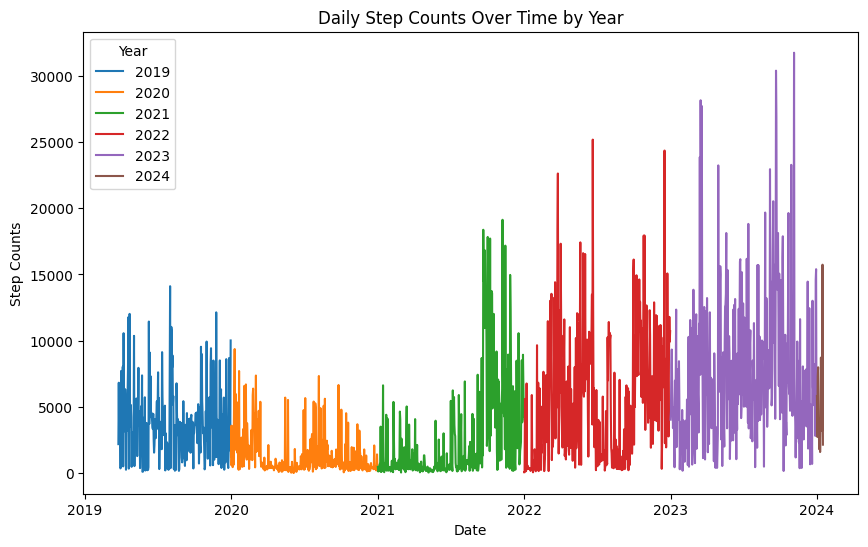

In [19]:
import matplotlib.pyplot as plt

# Ensure 'Date' is of datetime type for .dt accessor to work
df_steps['Date'] = pd.to_datetime(df_steps['Date'])

# Grouping by Date and Year for the time series
df_steps['Year'] = df_steps['Date'].dt.year

# Ensure the sum is calculated only for the 'Steps' column
df_time_series = df_steps.groupby(['Date', 'Year'])['Steps'].sum().unstack()

# Plotting
plt.figure(figsize=(10, 6))
plt.title('Daily Step Counts Over Time by Year')
plt.xlabel('Date')
plt.ylabel('Step Counts')
plt.plot(df_time_series)
plt.legend(df_time_series.columns, title='Year')
plt.show()


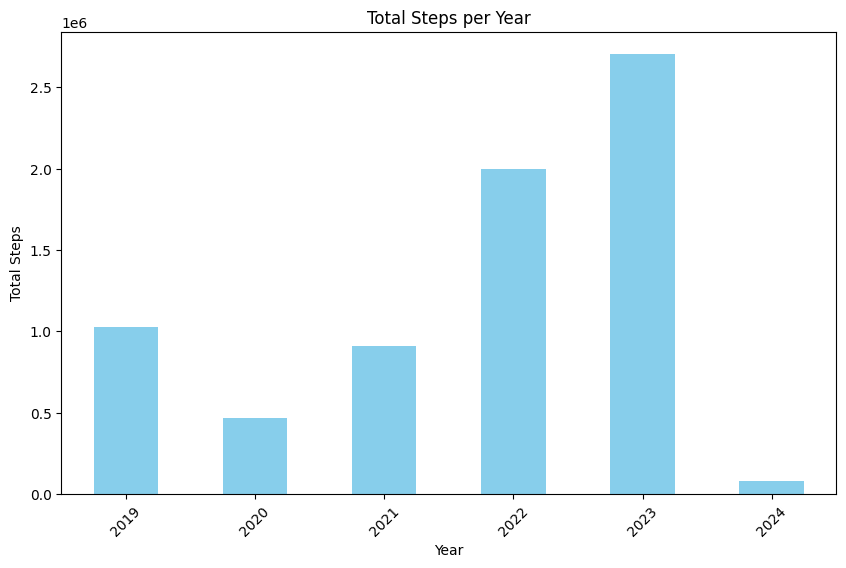

In [20]:
plt.figure(figsize=(10, 6))
plt.title('Total Steps per Year')
plt.xlabel('Year')
plt.ylabel('Total Steps')
yearly_steps.plot(kind='bar', color='skyblue')
plt.xticks(rotation=45)
plt.show()


/var/folders/g9/yv3t8cks2f5b4jy4k4x0mfr80000gn/T/ipykernel_1031/3392160540.py:5: FutureWarning: The provided callable <function mean at 0x1069f0f40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  heatmap_data = df_steps.pivot_table(


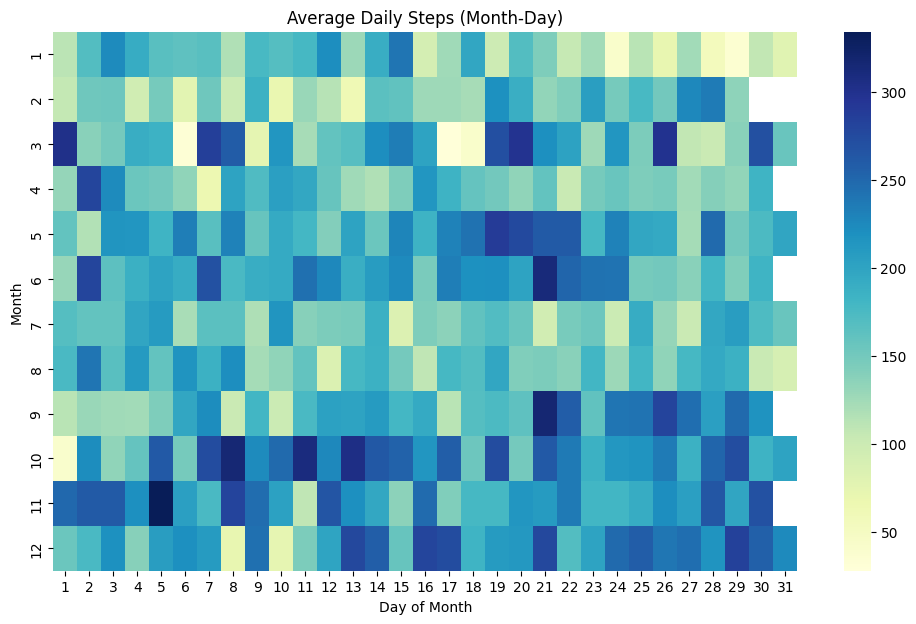

In [21]:
import seaborn as sns
import numpy as np

# Pivot table for heatmap
heatmap_data = df_steps.pivot_table(
    values='Steps', 
    index=df_steps['Date'].dt.month, 
    columns=df_steps['Date'].dt.day, 
    aggfunc=np.mean
)

plt.figure(figsize=(12, 7))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Average Daily Steps (Month-Day)')
plt.xlabel('Day of Month')
plt.ylabel('Month')
plt.show()


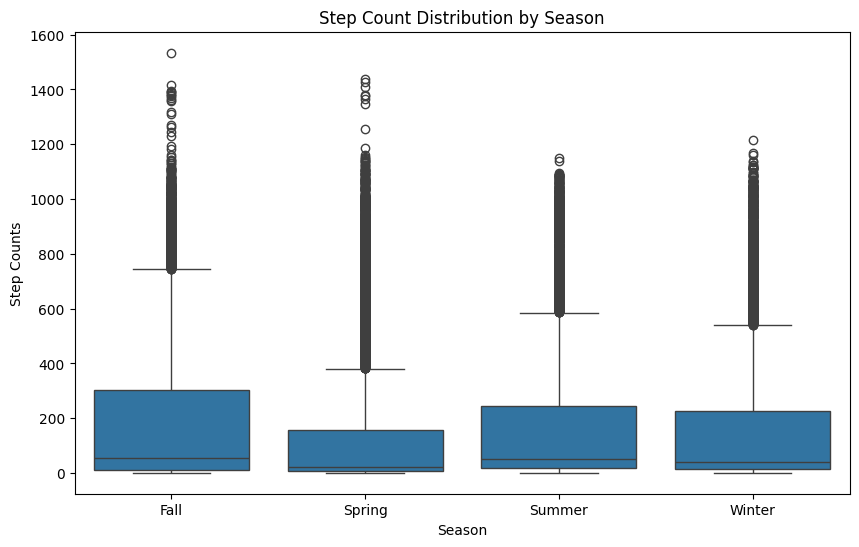

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Season', y='Steps', data=df_steps)
plt.title('Step Count Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Step Counts')
plt.show()


In [26]:
import plotly.express as px

# Interactive Time Series
fig = px.line(df_steps, x='Date', y='Steps', color='Year', title='Daily Step Counts Over Time by Year')
fig.show()

# Interactive Bar Plot (Total Steps per Year)
fig = px.bar(yearly_steps.reset_index(), x='Year', y='Steps', title='Total Steps per Year')
fig.show()

# Interactive Seasonal Bar Plot
fig = px.bar(seasonal_yearly_steps.reset_index(), x='Year', y='Steps', color='Season', barmode='group', title='Total Steps per Season and Year')
fig.show()


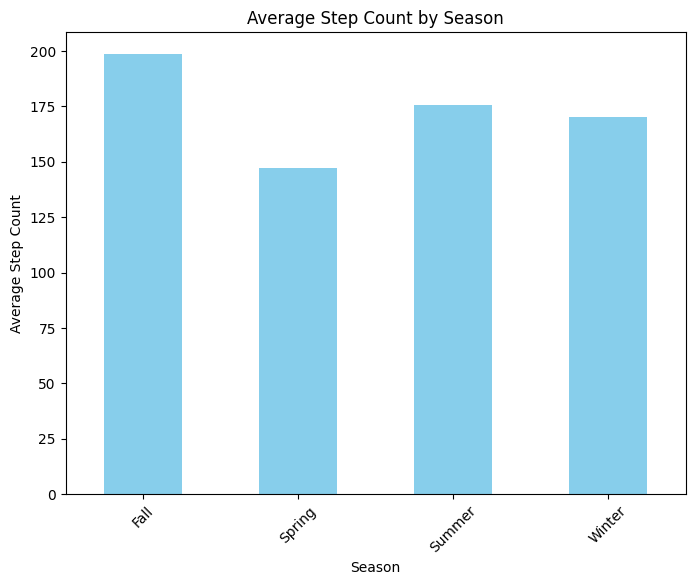

In [28]:
# Plotting steps by season
seasonal_steps = df_steps.groupby('Season')['Steps'].mean()

plt.figure(figsize=(8, 6))
seasonal_steps.plot(kind='bar', color='skyblue')
plt.title('Average Step Count by Season')
plt.xlabel('Season')
plt.ylabel('Average Step Count')
plt.xticks(rotation=45)
plt.show()


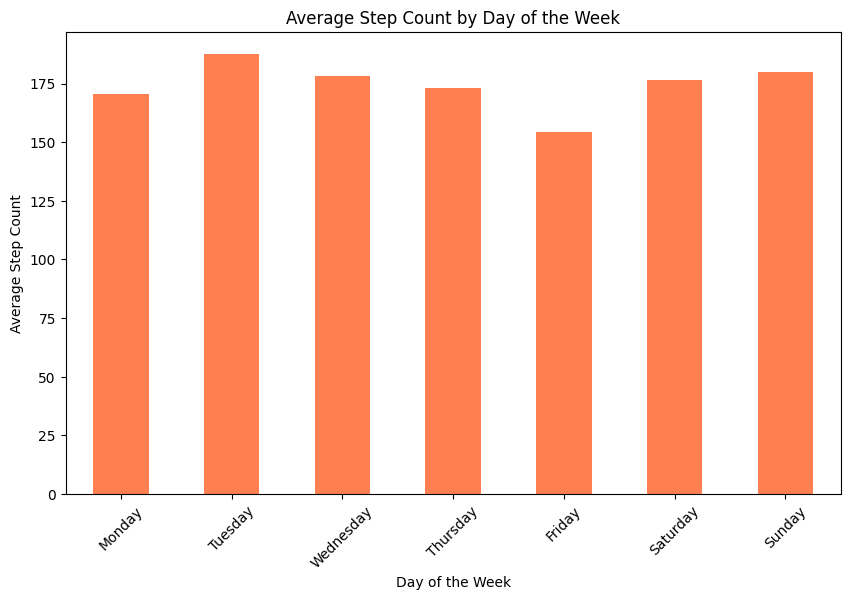

In [29]:
# Add a column 'DayOfWeek' to the dataframe
df_steps['DayOfWeek'] = df_steps['Date'].dt.day_name()

# Calculate average steps for each day of the week
weekday_steps = df_steps.groupby('DayOfWeek')['Steps'].mean()

# Plotting
plt.figure(figsize=(10, 6))
weekday_steps.loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']].plot(kind='bar', color='coral')
plt.title('Average Step Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Step Count')
plt.xticks(rotation=45)
plt.show()


SLEEP DURATION

In [34]:
import xml.etree.ElementTree as ET
import pandas as pd

# Load and parse the XML file
tree = ET.parse('/Users/ilgazsahin/Desktop/apple_health_export 3/export.xml')  # replace with your actual file path
root = tree.getroot()

# Function to extract sleep data
def extract_sleep_data(root_element):
    sleep_data = []
    for record in root_element.iter('Record'):
        # Filter for Sleep Analysis records
        if record.get('type') == 'HKCategoryTypeIdentifierSleepAnalysis':
            # Extract start date, end date and value (sleep type)
            start_date = record.get('startDate')
            end_date = record.get('endDate')
            value = record.get('value')  # Might indicate the type of sleep (e.g., inBed, asleep)
            sleep_data.append({'StartDateTime': start_date, 'EndDateTime': end_date, 'Value': value})
    return sleep_data

# Extracting sleep data
sleep_data = extract_sleep_data(root)

# Converting to DataFrame for easier manipulation
df_sleep = pd.DataFrame(sleep_data)

# Converting 'StartDateTime' and 'EndDateTime' to datetime objects
df_sleep['StartDateTime'] = pd.to_datetime(df_sleep['StartDateTime'])
df_sleep['EndDateTime'] = pd.to_datetime(df_sleep['EndDateTime'])

print(df_sleep.head())  # Displaying first few entries


              StartDateTime               EndDateTime  \
0 2019-04-08 02:11:44+03:00 2019-04-08 07:30:11+03:00   
1 2019-04-09 00:30:00+03:00 2019-04-09 07:34:45+03:00   
2 2019-04-10 01:21:36+03:00 2019-04-10 07:15:28+03:00   
3 2019-04-10 07:15:40+03:00 2019-04-10 07:31:01+03:00   
4 2019-04-11 00:49:48+03:00 2019-04-11 07:50:46+03:00   

                               Value  
0  HKCategoryValueSleepAnalysisInBed  
1  HKCategoryValueSleepAnalysisInBed  
2  HKCategoryValueSleepAnalysisInBed  
3  HKCategoryValueSleepAnalysisInBed  
4  HKCategoryValueSleepAnalysisInBed  


In [44]:
import pandas as pd

# Assuming df_sleep is already defined and contains 'StartDateTime', 'EndDateTime', and 'Value'

# Convert 'StartDateTime' and 'EndDateTime' to datetime objects
df_sleep['StartDateTime'] = pd.to_datetime(df_sleep['StartDateTime'])
df_sleep['EndDateTime'] = pd.to_datetime(df_sleep['EndDateTime'])

# Calculate sleep duration for each record
df_sleep['SleepDuration'] = df_sleep['EndDateTime'] - df_sleep['StartDateTime']

# Extract date from 'StartDateTime' (you might want to adjust this if your sleep records can cross midnight)
df_sleep['Date'] = df_sleep['StartDateTime'].dt.date

# Group by date and sum the durations
df_daily_sleep = df_sleep.groupby('Date')['SleepDuration'].sum()
df_daily_sleep.to_csv('daily_sleep.csv', header=True)

print(df_daily_sleep)


Date
2019-04-08   0 days 05:18:27
2019-04-09   0 days 07:04:45
2019-04-10   0 days 06:09:13
2019-04-11   0 days 07:00:58
2019-04-12   0 days 07:12:36
                   ...      
2019-11-21   0 days 06:40:29
2019-11-22   0 days 05:18:20
2019-11-25   0 days 04:23:24
2019-11-26   0 days 07:07:32
2020-06-11   0 days 06:03:03
Name: SleepDuration, Length: 113, dtype: timedelta64[ns]


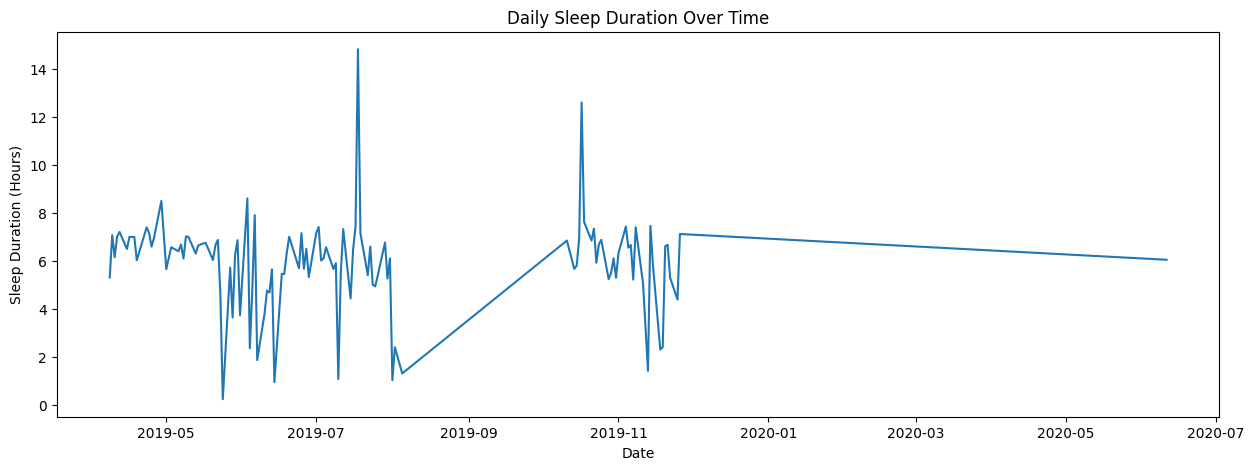

In [33]:
import matplotlib.pyplot as plt

# Ensure 'Date' is a datetime object for plotting
df_daily_sleep.index = pd.to_datetime(df_daily_sleep.index)

plt.figure(figsize=(15, 5))
plt.plot(df_daily_sleep.index, df_daily_sleep.dt.total_seconds() / 3600, color='tab:blue')  # Convert duration to hours
plt.title('Daily Sleep Duration Over Time')
plt.xlabel('Date')
plt.ylabel('Sleep Duration (Hours)')
plt.show()


In [57]:
import xml.etree.ElementTree as ET
import pandas as pd

# Load and parse the XML file
tree = ET.parse('/Users/ilgazsahin/Desktop/apple_health_export 3/export.xml')  # replace with your actual file path
root = tree.getroot()

# Function to extract Active Energy Burned data
def extract_active_energy_burned_data(root_element):
    energy_data = []
    for record in root_element.iter('Record'):
        # Filter for Active Energy Burned records
        if record.get('type') == 'HKQuantityTypeIdentifierActiveEnergyBurned':
            # Extract date, time and energy burned value
            date_time = record.get('startDate')  # startDate attribute contains the date and time
            energy_burned = float(record.get('value'))  # value attribute contains the energy burned
            energy_data.append({'DateTime': date_time, 'EnergyBurned': energy_burned})
    return energy_data

# Extracting Active Energy Burned data
active_energy_data = extract_active_energy_burned_data(root)

# Converting to DataFrame for easier manipulation
df_active_energy = pd.DataFrame(active_energy_data)

# Converting 'DateTime' to datetime object and extracting date
df_active_energy['DateTime'] = pd.to_datetime(df_active_energy['DateTime'])
df_active_energy['Date'] = df_active_energy['DateTime'].dt.date

# Assuming df_active_energy is already defined and contains 'DateTime', 'EnergyBurned', and 'Date'

# Grouping by date and summing the energy burned for each day
df_daily_energy = df_active_energy.groupby('Date')['EnergyBurned'].sum()

print(df_daily_energy)  # Displaying the total active energy burned for each day (first few entries)

df_daily_energy.to_csv('daily_energy.csv', header=True)



Date
2023-05-30     70.087
2023-05-31    188.565
2023-06-01     72.872
2023-06-02    208.853
2023-06-03    132.717
               ...   
2024-01-12    135.272
2024-01-13    108.482
2024-01-14     80.081
2024-01-15    525.780
2024-01-16     51.289
Name: EnergyBurned, Length: 232, dtype: float64


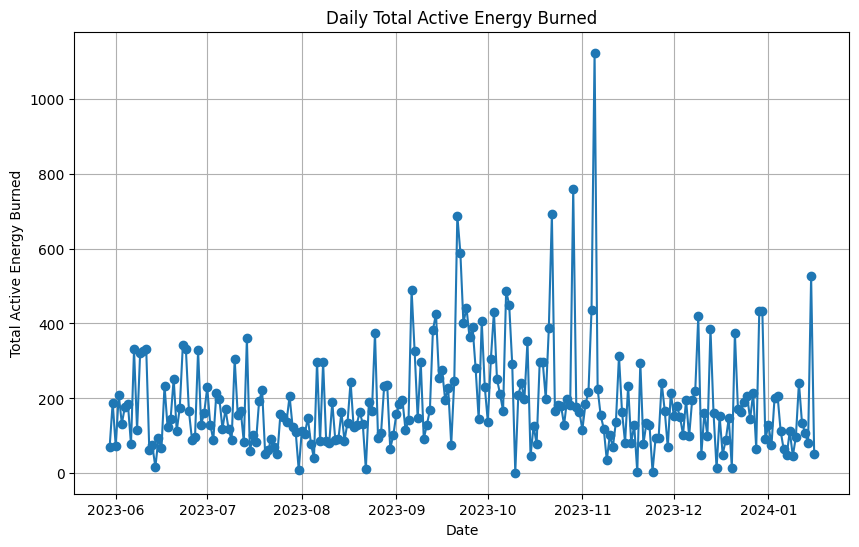

In [40]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_daily_energy.index, df_daily_energy.values, marker='o')
plt.title('Daily Total Active Energy Burned')
plt.xlabel('Date')
plt.ylabel('Total Active Energy Burned')
plt.grid(True)
plt.show()


In [56]:
# Improved function to extract Walking Speed data
def extract_walking_speed_data_improved(root_element):
    walking_speed_data = []
    for record in root_element.iter('Record'):
        # Check if the record has the 'type' and 'value' attributes
        if 'type' in record.attrib and 'value' in record.attrib:
            # Filter for Walking Speed records
            if record.get('type') == 'HKQuantityTypeIdentifierWalkingSpeed':
                # Extract date, time, and walking speed value
                date_time = record.get('startDate')  # startDate attribute contains the date and time
                walking_speed = float(record.get('value'))  # value attribute contains the walking speed
                walking_speed_data.append({'DateTime': date_time, 'WalkingSpeed': walking_speed})
    return walking_speed_data

# Extracting Walking Speed data with the improved function
walking_speed_data_improved = extract_walking_speed_data_improved(root)

# Converting to DataFrame for easier manipulation
df_walking_speed_improved = pd.DataFrame(walking_speed_data_improved)

# Converting 'DateTime' to datetime object and extracting date
df_walking_speed_improved['DateTime'] = pd.to_datetime(df_walking_speed_improved['DateTime'])
df_walking_speed_improved['Date'] = df_walking_speed_improved['DateTime'].dt.date

# Displaying first few entries
df_walking_speed_improved.head()# Grouping by date and calculating the average walking speed for each day
average_walking_speed_per_day = df_walking_speed_improved.groupby('Date')['WalkingSpeed'].mean()

average_walking_speed_per_day.to_csv('daily_speed.csv', header=True)
# Displaying first few entries
average_walking_speed_per_day.head()



Date
2020-11-29    4.3560
2020-12-02    3.8520
2020-12-03    4.5792
2020-12-07    3.9000
2020-12-09    3.4200
Name: WalkingSpeed, dtype: float64

In [67]:
import pandas as pd

# Define file paths
file_paths = {
    'energy': '/Users/ilgazsahin/Desktop/data/daily_energy.csv',
    'sleep': '/Users/ilgazsahin/Desktop/data/daily_sleep.csv',
    'steps': '/Users/ilgazsahin/Desktop/data/daily_steps.csv',
    'speed': '/Users/ilgazsahin/Desktop/daily_speed.csv'
}

# Load the CSV files
df_energy = pd.read_csv(file_paths['energy'])
df_sleep = pd.read_csv(file_paths['sleep'])
df_steps = pd.read_csv(file_paths['steps'])
df_speed = pd.read_csv(file_paths['speed'])

# Merge the DataFrames
df_merged = pd.merge(df_energy, df_sleep, on='Date', how='outer')
df_merged = pd.merge(df_merged, df_steps, on='Date', how='outer')
df_merged = pd.merge(df_merged, df_speed, on='Date', how='outer')

# Displaying first few entries of the merged DataFrame
print(df_merged.head())

df_merged.to_csv('df_merged.csv', header=True)


         Date  EnergyBurned SleepDuration  Steps  WalkingSpeed
0  2023-05-30        70.087           NaN   3375      4.240286
1  2023-05-31       188.565           NaN   6678      4.316727
2  2023-06-01        72.872           NaN   2428      3.436800
3  2023-06-02       208.853           NaN   8475      3.732632
4  2023-06-03       132.717           NaN   4281      3.921882


how many posts i liked each day(for last one year)

In [88]:
import json
from datetime import datetime
import pandas as pd

# Reading the JSON file
with open('/Users/ilgazsahin/Desktop/likes/liked_posts.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Extracting likes data
likes_data = data["likes_media_likes"]

# Preparing a list for parsed data
parsed_likes = []

# Parsing each like entry
for like in likes_data:
    for data in like["string_list_data"]:
        timestamp = data["timestamp"]
        date = datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d')
        parsed_likes.append(date)

# Counting likes per day
likes_count_per_day = pd.Series(parsed_likes).value_counts().sort_index()

# Displaying the count of likes per day
print(likes_count_per_day)


2023-01-18     1
2023-01-19     9
2023-01-20     7
2023-01-21     6
2023-01-22     9
              ..
2024-01-14     9
2024-01-15    20
2024-01-16    15
2024-01-17    11
2024-01-18    10
Name: count, Length: 358, dtype: int64


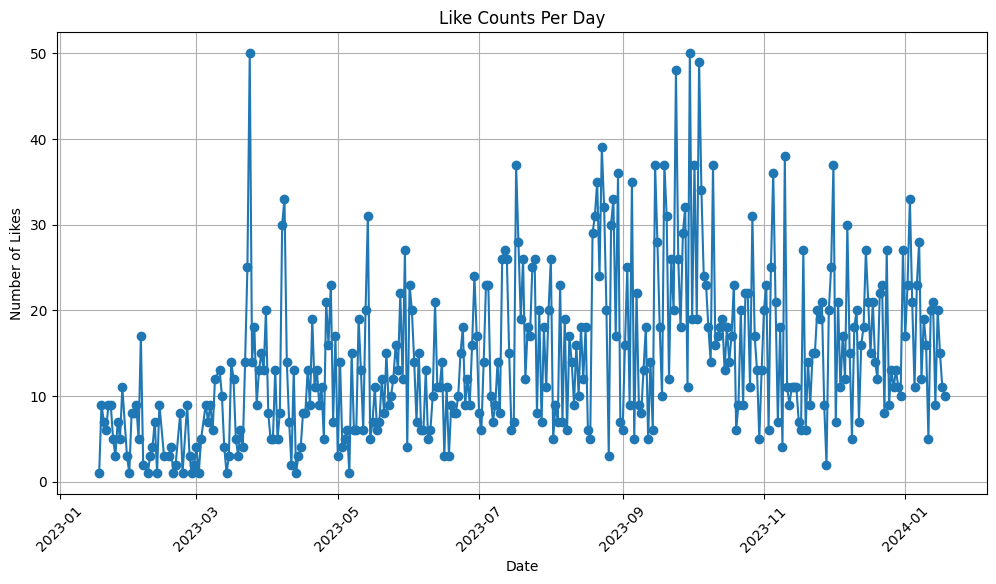

In [89]:
import matplotlib.pyplot as plt

# Convert like counts to a DataFrame
likes_df = likes_count_per_day.reset_index()
likes_df.columns = ['Date', 'Likes']

# Convert 'Date' to datetime for plotting
likes_df['Date'] = pd.to_datetime(likes_df['Date'])

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(likes_df['Date'], likes_df['Likes'], marker='o', linestyle='-')
plt.title('Like Counts Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Likes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


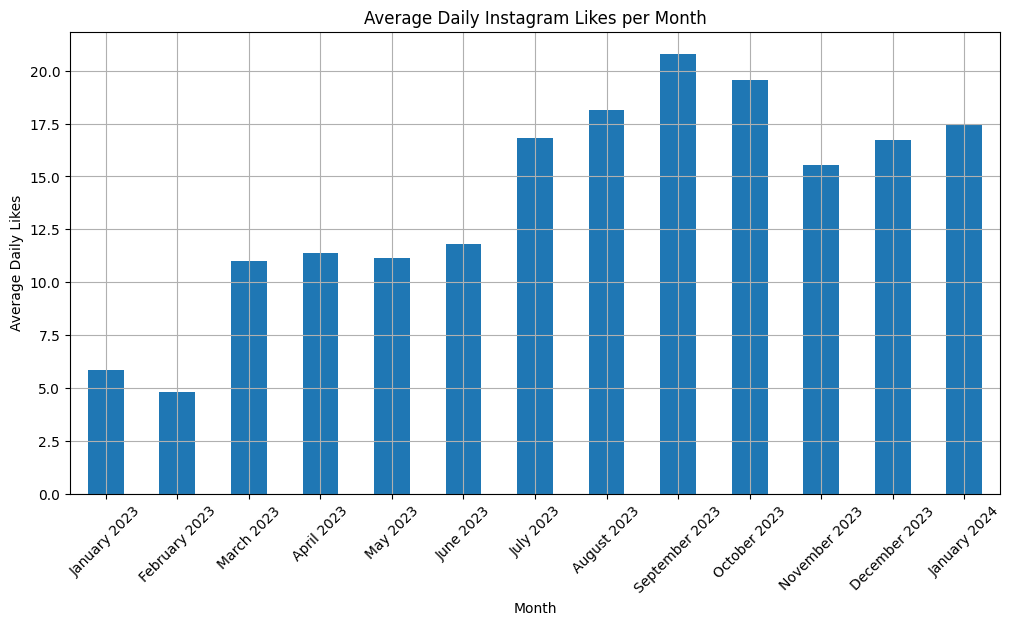

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Assuming 'likes_count_per_day' is your Series with daily like counts
# Convert the index to datetime (if not already)
likes_count_per_day.index = pd.to_datetime(likes_count_per_day.index)

# Group by year and month, then calculate the mean
monthly_avg_likes = likes_count_per_day.groupby([likes_count_per_day.index.year, likes_count_per_day.index.month]).mean()

# Creating a new index with month names
monthly_avg_likes.index = monthly_avg_likes.index.map(lambda x: calendar.month_name[x[1]] + ' ' + str(x[0]))

# Plotting
monthly_avg_likes.plot(kind='bar', figsize=(12, 6))

plt.title('Average Daily Instagram Likes per Month')
plt.xlabel('Month')
plt.ylabel('Average Daily Likes')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


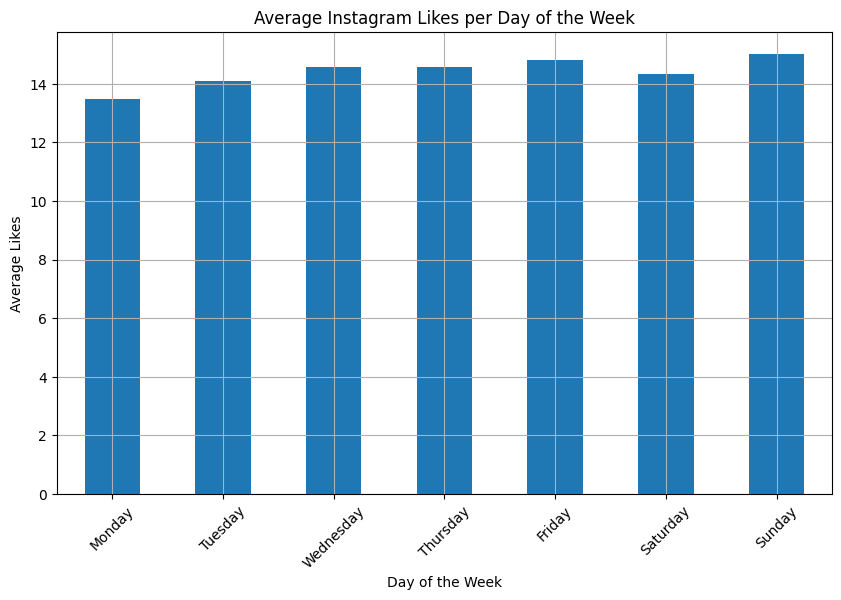

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'likes_count_per_day' is your Series with daily like counts
# Convert the index to datetime
likes_count_per_day.index = pd.to_datetime(likes_count_per_day.index)

# Extract the day of the week and create a new DataFrame
likes_df = pd.DataFrame({'Likes': likes_count_per_day})
likes_df['DayOfWeek'] = likes_df.index.day_name()

# Calculate the average likes for each day of the week
avg_likes_per_day = likes_df.groupby('DayOfWeek')['Likes'].mean()

# Ordering the days for the plot
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
avg_likes_per_day = avg_likes_per_day.reindex(ordered_days)

# Create a bar chart
avg_likes_per_day.plot(kind='bar', figsize=(10, 6))

# Formatting the plot
plt.title('Average Instagram Likes per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Likes')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()


In [93]:
import json
from datetime import datetime
import pandas as pd

# Load JSON data
with open('/Users/ilgazsahin/Desktop/instagram-ilgazsahin-2024-01-18-knrJhNUe/your_instagram_activity/saved/saved_posts.json', 'r') as file:
    data = json.load(file)

# Extract saved posts data
saved_posts = data['saved_saved_media']

# Parse the saved posts data
saved_dates = []
for post in saved_posts:
    timestamp = post["string_map_data"]["Saved on"]["timestamp"]
    date = datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d')
    saved_dates.append(date)

# Count saved posts per day
saved_count_per_day = pd.Series(saved_dates).value_counts().sort_index()

# Output the result
print(saved_count_per_day)


2023-01-18    1
2023-01-19    8
2023-01-20    2
2023-01-22    7
2023-01-23    2
             ..
2024-01-13    3
2024-01-14    1
2024-01-15    5
2024-01-16    4
2024-01-17    2
Name: count, Length: 313, dtype: int64


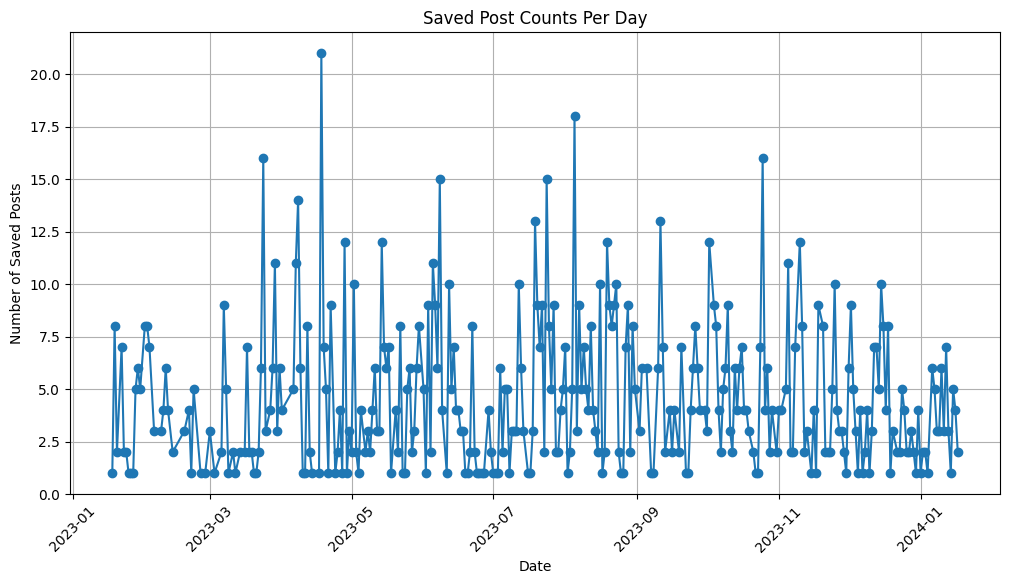

In [94]:
import matplotlib.pyplot as plt

# Assuming saved_count_per_day is a pandas Series with the index as dates
# and the values as the count of saved posts

# Convert the index to datetime (if it's not already)
saved_count_per_day.index = pd.to_datetime(saved_count_per_day.index)

# Create a plot
plt.figure(figsize=(12, 6))
plt.plot(saved_count_per_day.index, saved_count_per_day, marker='o', linestyle='-')
plt.title('Saved Post Counts Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Saved Posts')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [97]:


import json
from datetime import datetime
import pandas as pd

def parse_message_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)

    messages = data['messages']
    message_counts = {}
    for message in messages:
        # Replace 'Your Name' with your actual name as it appears in the messages
        if message['sender_name'] == 'Ilgaz \u00f0\u009f\u00a6\u00ad':
            date = datetime.fromtimestamp(message['timestamp_ms'] // 1000).strftime('%Y-%m-%d')
            message_counts[date] = message_counts.get(date, 0) + 1

    return message_counts

# Paths to your JSON files
file_paths = ['/Users/ilgazsahin/Desktop/instagram-ilgazsahin-2024-01-18-knrJhNUe/your_instagram_activity/messages/inbox/buse_418429602881742/message_1.json', '/Users/ilgazsahin/Desktop/instagram-ilgazsahin-2024-01-18-knrJhNUe/your_instagram_activity/messages/inbox/baharakbas_861301104748439/message_1.json','/Users/ilgazsahin/Desktop/instagram-ilgazsahin-2024-01-18-knrJhNUe/your_instagram_activity/messages/inbox/erenvarliker_1073180780739951/message_1.json','/Users/ilgazsahin/Desktop/instagram-ilgazsahin-2024-01-18-knrJhNUe/your_instagram_activity/messages/inbox/erenbadur_839880107412586/message_1.json','/Users/ilgazsahin/Desktop/instagram-ilgazsahin-2024-01-18-knrJhNUe/your_instagram_activity/messages/inbox/utku_449473433110782/message_1.json']  # Update these paths

# Aggregating message counts from all files
all_message_counts = {}
for path in file_paths:
    message_counts = parse_message_data(path)
    for date, count in message_counts.items():
        all_message_counts[date] = all_message_counts.get(date, 0) + count

# Convert to pandas Series for easier handling
message_counts_series = pd.Series(all_message_counts).sort_index()

# Output the result
print(message_counts_series)


2023-01-18     5
2023-01-19     7
2023-01-21     2
2023-01-22    40
2023-01-23    14
              ..
2024-01-14     3
2024-01-15     8
2024-01-16     4
2024-01-17     1
2024-01-18     6
Length: 343, dtype: int64


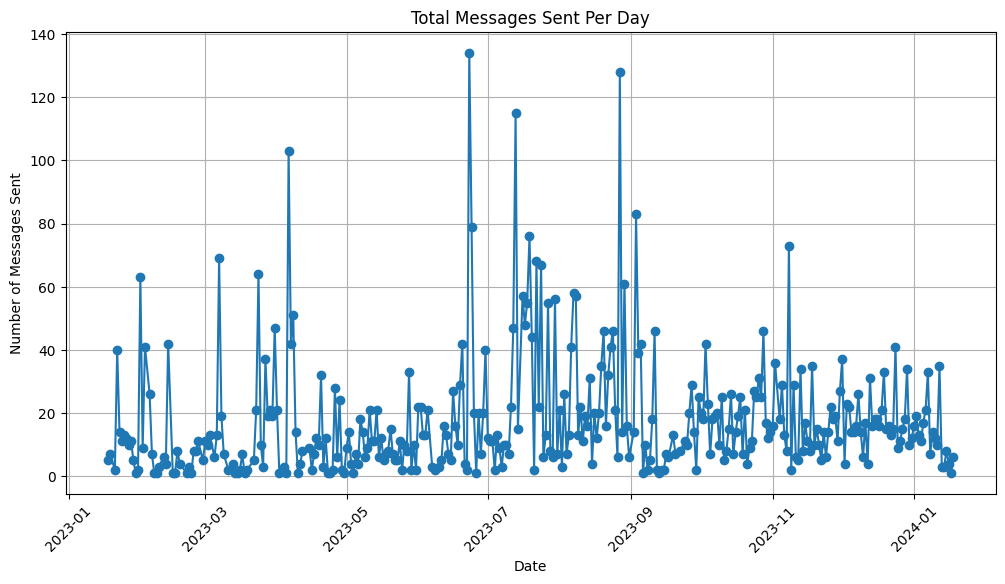

In [98]:
import matplotlib.pyplot as plt

# Assuming message_counts_series is a pandas Series with the index as dates
# and the values as the count of messages sent

# Convert the index to datetime (if it's not already)
message_counts_series.index = pd.to_datetime(message_counts_series.index)

# Create a plot
plt.figure(figsize=(12, 6))
plt.plot(message_counts_series.index, message_counts_series, marker='o', linestyle='-')
plt.title('Total Messages Sent Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Messages Sent')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [112]:


from sklearn.preprocessing import MinMaxScaler
import pandas as pd




# Replace these with your actual data series
# Assuming likes_count_per_day, saved_count_per_day, and message_counts_series are actual pandas Series
liked_counts_series = pd.Series(likes_count_per_day)  # Replace with your actual liked counts per day
saved_counts_series = pd.Series(saved_count_per_day)  # Replace with your actual saved counts per day
message_counts_series = pd.Series(message_counts_series)  # Replace with your actual message counts per day

# Normalize each series to a 0-100 scale
scaler = MinMaxScaler(feature_range=(0, 100))

# Normalize the data
liked_normalized = scaler.fit_transform(likes_count_per_day.values.reshape(-1, 1)).flatten()   
saved_normalized = scaler.fit_transform(saved_count_per_day.values.reshape(-1, 1)).flatten() 
message_normalized = scaler.fit_transform(message_counts_series.values.reshape(-1, 1)).flatten() 

# Create new Series with the normalized data
liked_normalized_series = pd.Series(liked_normalized, index=likes_count_per_day.index)
saved_normalized_series = pd.Series(saved_normalized, index=saved_count_per_day.index)
message_normalized_series = pd.Series(message_normalized, index=message_counts_series.index)

# Combine the normalized scores
combined_scores = liked_normalized_series.add(saved_normalized_series, fill_value=0).add(message_normalized_series, fill_value=0)

# Scale the combined score to a maximum of 100 if needed
combined_scores = (combined_scores / combined_scores.max()) * 100

# Display the combined activity scores
print(combined_scores)



2023-01-18 00:00:00     0.000000
2023-01-19 00:00:00    29.329446
2023-01-20 00:00:00     9.854227
2023-01-21 00:00:00     5.830904
2023-01-22 00:00:00    26.472303
                         ...    
2024-01-15 00:00:00    33.586006
2024-01-16 00:00:00    24.897959
2024-01-17 00:00:00    14.518950
2024-01-18 00:00:00    10.495627
0                       0.000000
Length: 361, dtype: float64


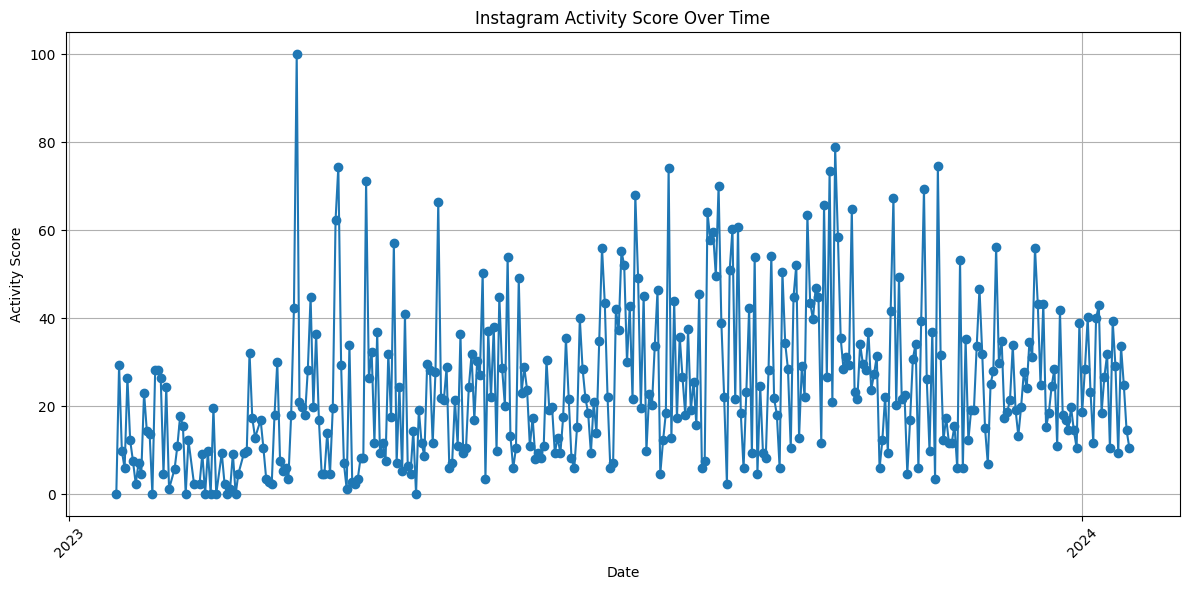

In [117]:
# Assuming combined_scores is a pandas Series containing the activity scores for each day
# Filter out any data that might be incorrectly timestamped as 1970
combined_scores = combined_scores[combined_scores.index.year > 1970]

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(combined_scores.index, combined_scores, marker='o', linestyle='-')
plt.title('Instagram Activity Score Over Time')
plt.xlabel('Date')
plt.ylabel('Activity Score')

# Customize the x-axis to show only the years for which we have data
years_in_data = combined_scores.index.year.unique()
plt.xticks([f'{year}-01-01' for year in years_in_data], labels=years_in_data)

# Ensure the labels are readable
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()


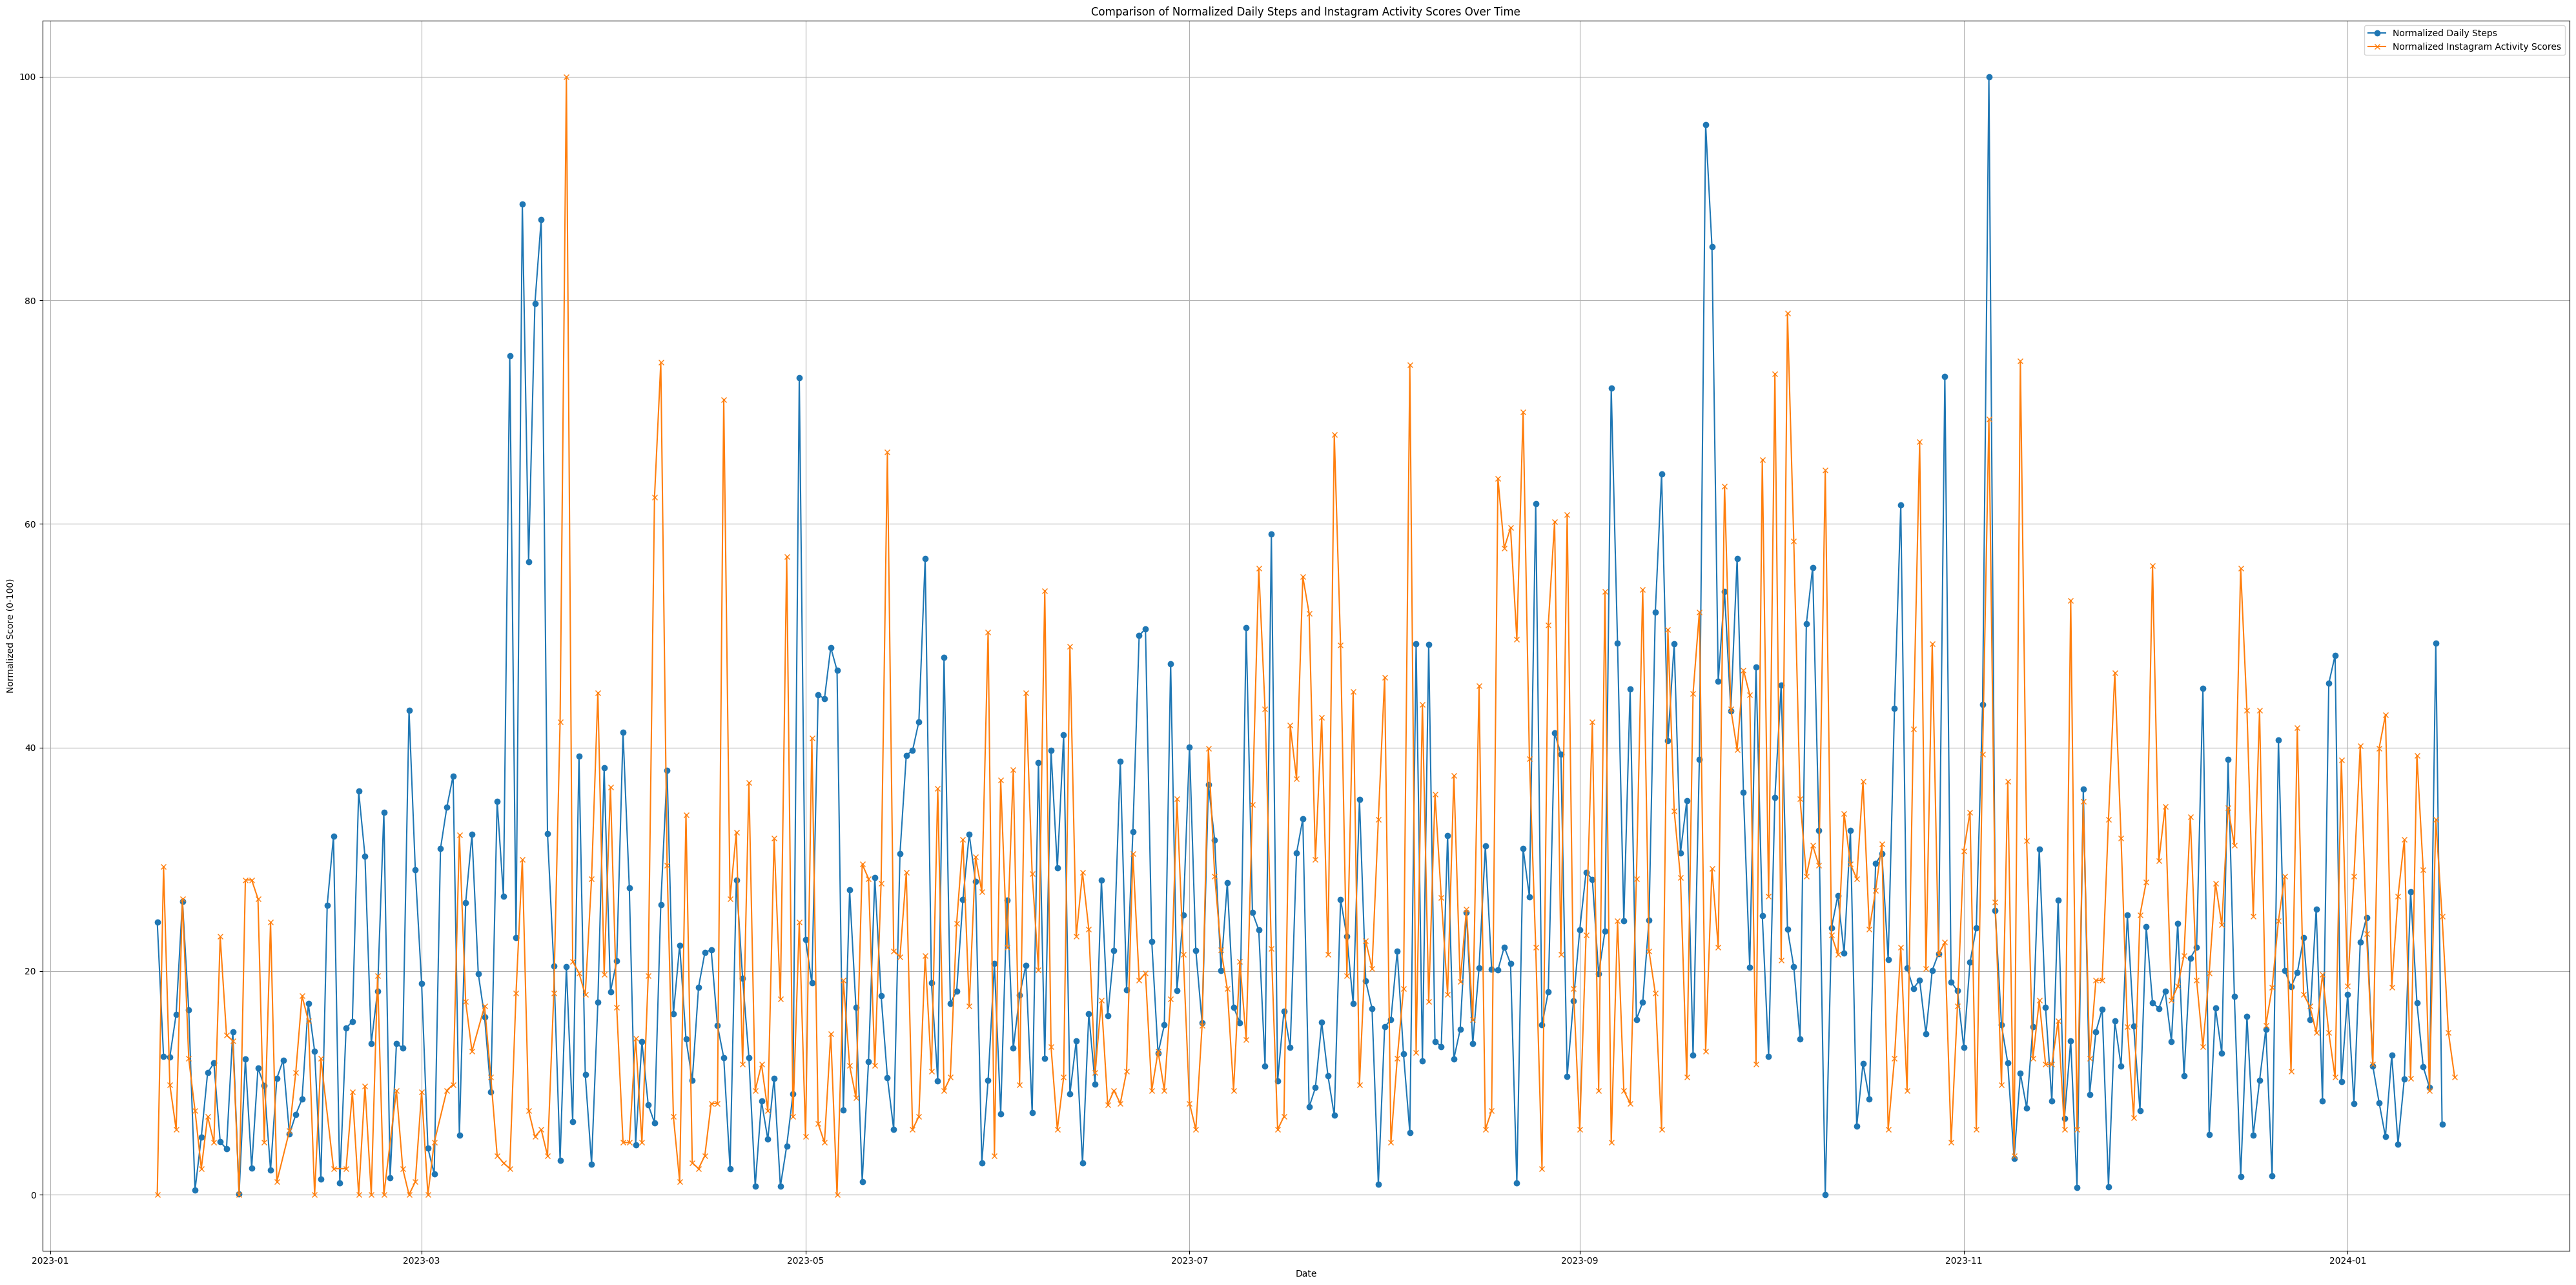

In [136]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assuming 'daily_steps' and 'combined_scores' are pandas Series indexed by date.
# First, we will trim the 'daily_steps' Series to the date range of 'combined_scores'.
start_date = combined_scores.index.min()
end_date = combined_scores.index.max()

# Filter 'daily_steps' to the same date range as 'combined_scores'
daily_steps_in_range = daily_steps[(daily_steps.index >= start_date) & (daily_steps.index <= end_date)]

# Normalize both series to a 0-100 scale for a fair comparison
scaler = MinMaxScaler(feature_range=(0, 100))
daily_steps_normalized = scaler.fit_transform(daily_steps_in_range.values.reshape(-1, 1)).flatten()
combined_scores_normalized = scaler.fit_transform(combined_scores.values.reshape(-1, 1)).flatten()

# Create normalized series with the original index
daily_steps_normalized_series = pd.Series(daily_steps_normalized, index=daily_steps_in_range.index)
combined_scores_normalized_series = pd.Series(combined_scores_normalized, index=combined_scores.index)

# Plotting both series on the same graph
plt.figure(figsize=(40,20))

plt.plot(daily_steps_normalized_series.index, daily_steps_normalized_series, label='Normalized Daily Steps', marker='o')
plt.plot(combined_scores_normalized_series.index, combined_scores_normalized_series, label='Normalized Instagram Activity Scores', marker='x')

plt.title('Comparison of Normalized Daily Steps and Instagram Activity Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Score (0-100)')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()


In [140]:
from scipy.stats import pearsonr

# Ensure the series are aligned and have the same date range
aligned_steps, aligned_scores = daily_steps_normalized_series.align(combined_scores_normalized_series, join='inner')

# Calculate the Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(aligned_steps, aligned_scores)

# Print the results
print(f'Correlation coefficient: {correlation_coefficient}')
print(f'p-value: {p_value}')

if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

# Interpret the correlation coefficient
if correlation_coefficient < 0:
    print("There is a negative correlation, supporting the hypothesis.")
elif correlation_coefficient > 0:
    print("There is a positive correlation, contradicting the hypothesis.")
else:
    print("There is no correlation between the variables.")


Correlation coefficient: -0.08191364706806224
p-value: 0.1218489060777037
The correlation is not statistically significant.
There is a negative correlation, supporting the hypothesis.


In [150]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Assuming 'daily_steps' is your pandas Series of daily step counts
daily_steps_data = pd.DataFrame({'Steps': daily_steps, 'DayIndex': np.arange(len(daily_steps))})
train_data, test_data = train_test_split(daily_steps_data, test_size=0.2, shuffle=False)

model_steps = LinearRegression()
model_steps.fit(train_data[['DayIndex']], train_data['Steps'])

last_index = train_data['DayIndex'].iloc[-1]
day_index_2024 = np.arange(last_index + 1, last_index + 1 + 365)
predicted_steps_2024 = model_steps.predict(day_index_2024.reshape(-1, 1))
mse_steps = mean_squared_error(test_data['Steps'], model_steps.predict(test_data[['DayIndex']]))

# Output the MSE and first few predictions for 2024
print("MSE:", mse_steps)
print("Predictions for early 2024:", predicted_steps_2024[:5])


MSE: 33541310.74695729
Predictions for early 2024: [5045.17046111 5047.75371601 5050.33697091 5052.92022581 5055.50348071]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



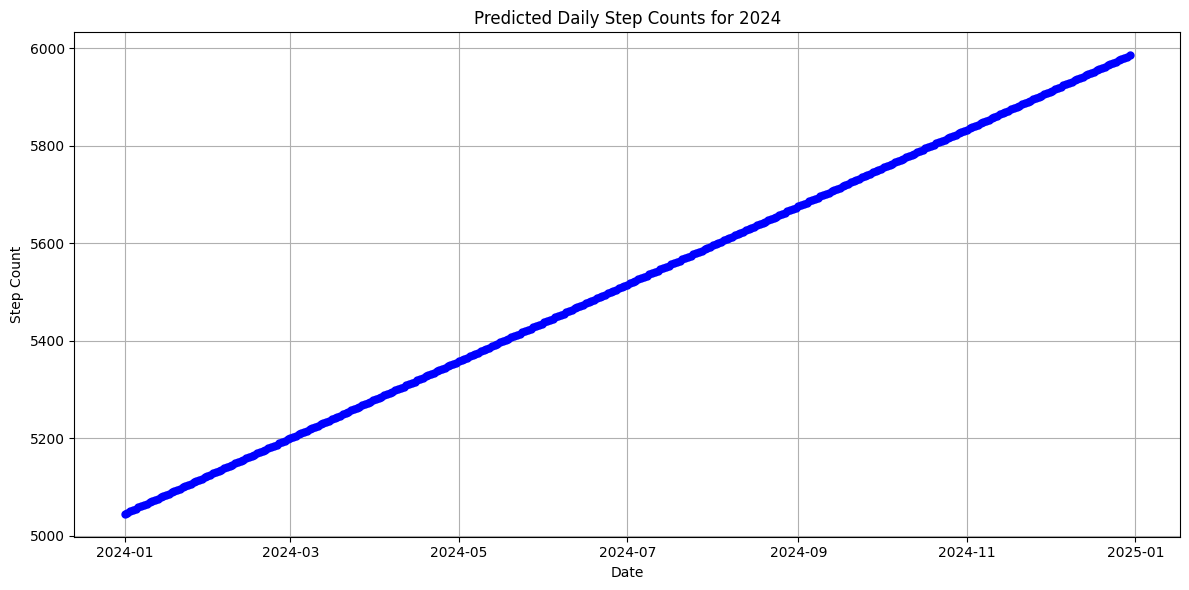

In [151]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'predicted_steps_2024' is an array with your predicted step counts for 2024
dates_2024 = pd.date_range(start='2024-01-01', periods=len(predicted_steps_2024), freq='D')

plt.figure(figsize=(12, 6))
plt.plot(dates_2024, predicted_steps_2024, color='blue', marker='o', linestyle='-', linewidth=2, markersize=5)
plt.title('Predicted Daily Step Counts for 2024')
plt.xlabel('Date')
plt.ylabel('Step Count')
plt.grid(True)
plt.tight_layout()
plt.show()


In [152]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Assuming 'combined_scores' is your pandas Series of combined Instagram activity scores
activity_score_data = pd.DataFrame({'ActivityScores': combined_scores, 'DayIndex': np.arange(len(combined_scores))})
train_data_activity, test_data_activity = train_test_split(activity_score_data, test_size=0.2, shuffle=False)

model_activity = LinearRegression()
model_activity.fit(train_data_activity[['DayIndex']], train_data_activity['ActivityScores'])

last_index_activity = train_data_activity['DayIndex'].iloc[-1]
day_index_2024_activity = np.arange(last_index_activity + 1, last_index_activity + 1 + 365)
predicted_activity_scores_2024 = model_activity.predict(day_index_2024_activity.reshape(-1, 1))
mse_activity = mean_squared_error(test_data_activity['ActivityScores'], model_activity.predict(test_data_activity[['DayIndex']]))

# Output the MSE and first few predictions for 2024
print("MSE:", mse_activity)
print("Predictions for early 2024:", predicted_activity_scores_2024[:5])


MSE: 384.53613723600597
Predictions for early 2024: [36.28150929 36.36613786 36.45076643 36.535395   36.62002357]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



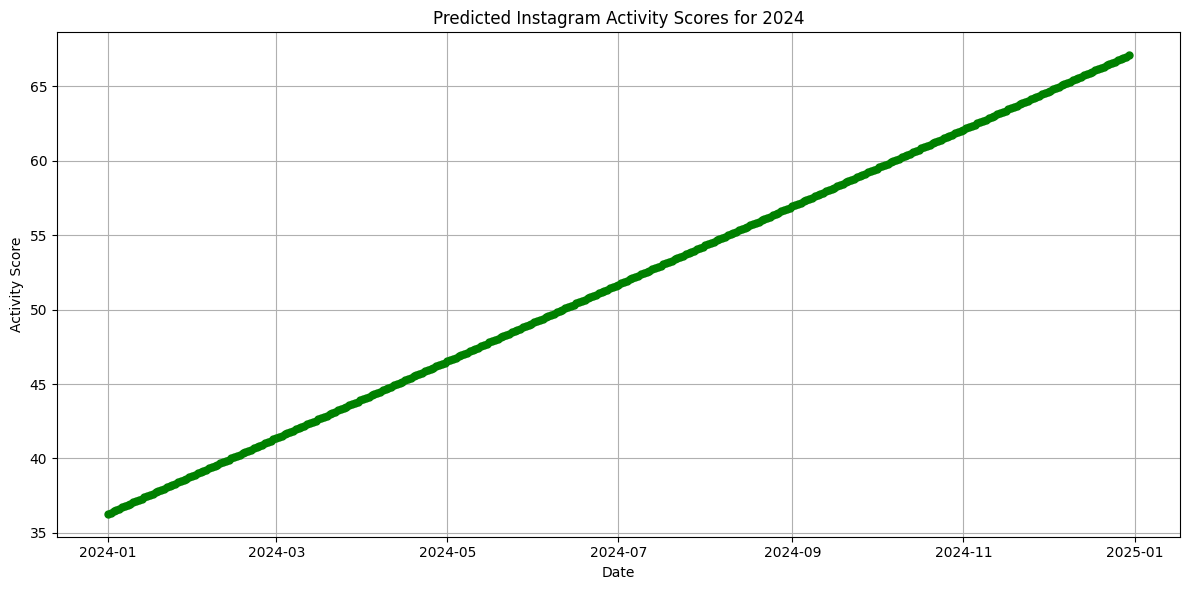

In [153]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'predicted_activity_scores_2024' is an array with your predicted activity scores for 2024
dates_2024_activity = pd.date_range(start='2024-01-01', periods=len(predicted_activity_scores_2024), freq='D')

plt.figure(figsize=(12, 6))
plt.plot(dates_2024_activity, predicted_activity_scores_2024, color='green', marker='o', linestyle='-', linewidth=2, markersize=5)
plt.title('Predicted Instagram Activity Scores for 2024')
plt.xlabel('Date')
plt.ylabel('Activity Score')
plt.grid(True)
plt.tight_layout()
plt.show()


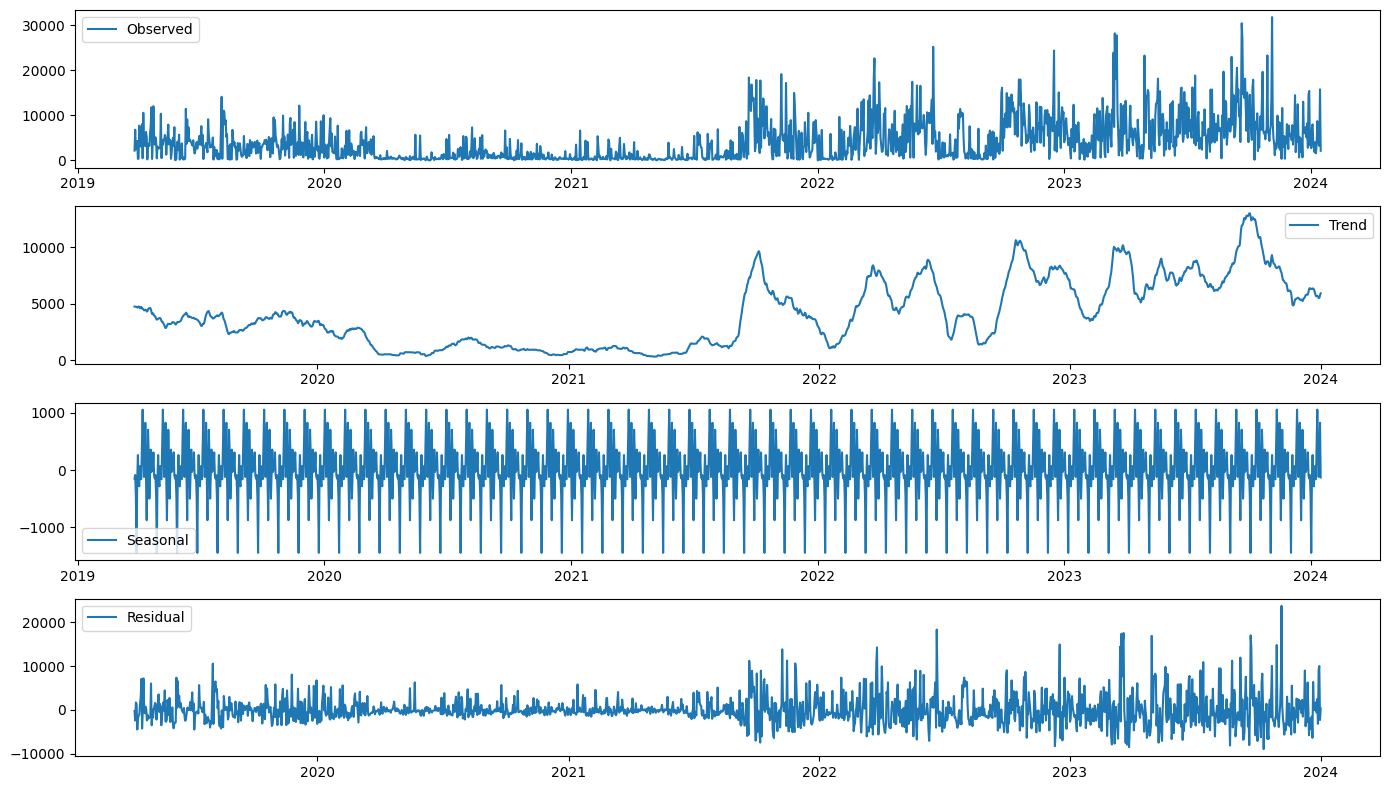

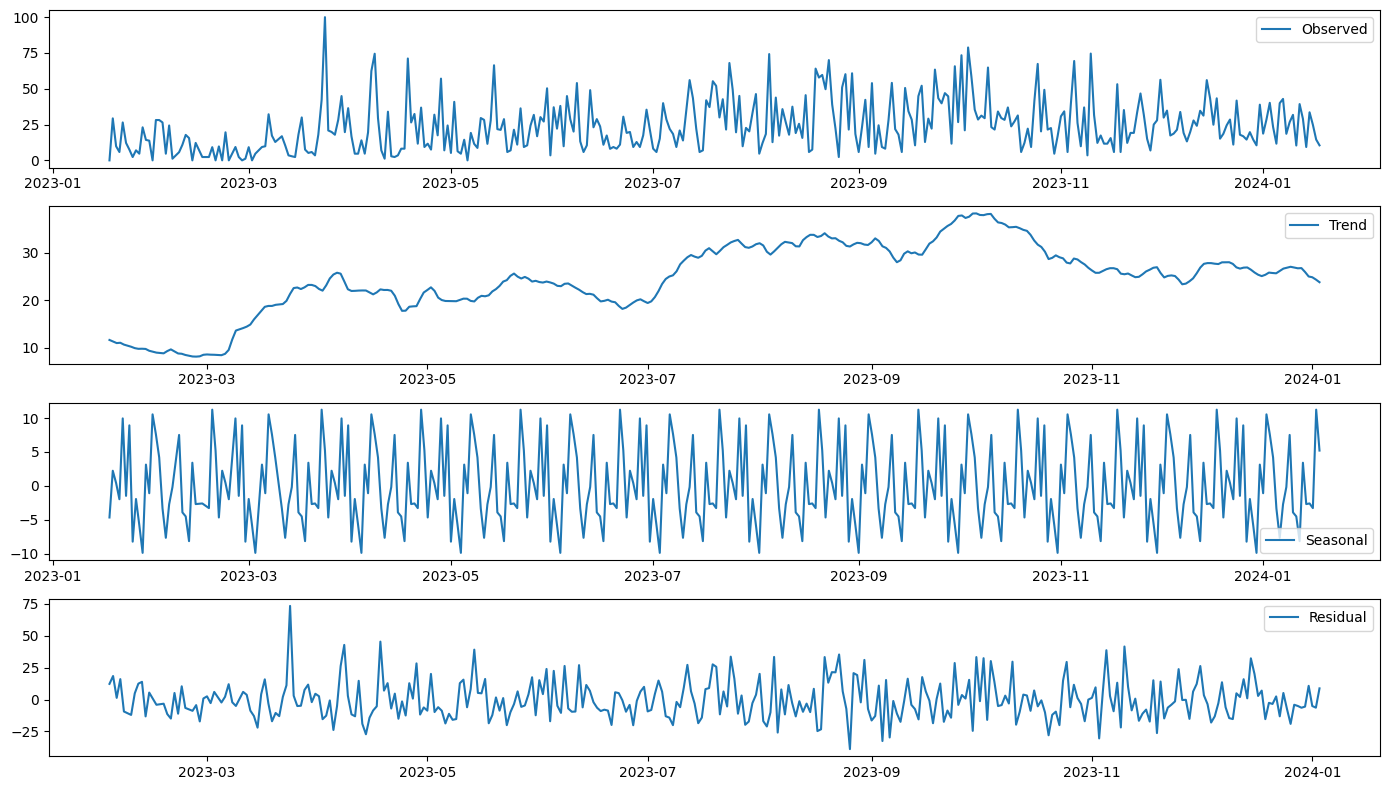

In [162]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Adjust the period based on your data's seasonality
# For example, for monthly seasonality, set period to 30
period = 180  # or any other number that suits your data's seasonality

decomposition_steps = seasonal_decompose(daily_steps, model='additive', period=period)
decomposition_scores = seasonal_decompose(combined_scores, model='additive', period=period)

# Continue with the plotting as before

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Assuming 'daily_steps' and 'combined_scores' are pandas Series indexed by date
# Adjusting the period for seasonal decomposition to match the data's frequency
period_adjusted = 30  # Example period, can be adjusted based on the actual seasonality in the data

# Decomposing daily steps with the adjusted period
decomposition_steps = seasonal_decompose(daily_steps, model='additive', period=period_adjusted)

# Decomposing combined Instagram activity scores with the adjusted period
decomposition_scores = seasonal_decompose(combined_scores, model='additive', period=period_adjusted)

# Plotting the decomposition results for daily steps
plt.figure(figsize=(14, 8))
plt.subplot(411)
plt.plot(decomposition_steps.observed, label='Observed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition_steps.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition_steps.seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition_steps.resid, label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Plotting the decomposition results for Instagram activity scores
plt.figure(figsize=(14, 8))
plt.subplot(411)
plt.plot(decomposition_scores.observed, label='Observed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition_scores.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition_scores.seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition_scores.resid, label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


